# **Titanic Data Cleaning for ML**
---
### 1. Explore Data

* **Load the dataset** into a DataFrame.
* **Check for missing values**
* **Understand data types**

### 2. Handle Missing Data

### 3. Encode Categories

### 4. Scale Numbers

### 5. Find & Remove Outliers



---
### Import necessary libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
### Load the Titanic dataset into a Pandas DataFrame.

In [2]:
url = "https://raw.githubusercontent.com/SiddardhaShayini/Titanic-Data-Cleaning-for-ML/refs/heads/main/Dataset/Titanic-Dataset.csv"
df = pd.read_csv(url)

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Columns in the Titanic dataset** with brief descriptions:

1. **PassengerId**: Unique ID assigned to each passenger.
2. **Survived**: Survival status (0 = Did not survive, 1 = Survived).
3. **Pclass**: Passenger class (1 = First, 2 = Second, 3 = Third); reflects socio-economic status.
4. **Name**: Full name of the passenger (includes title and sometimes relations).
5. **Sex**: Gender of the passenger (`male` or `female`).
6. **Age**: Age in years (can be fractional); missing for some passengers.
7. **SibSp**: Number of siblings or spouses aboard the Titanic.
8. **Parch**: Number of parents or children aboard.
9. **Ticket**: Ticket number (alphanumeric, may not be unique).
10. **Fare**: Fare paid for the ticket (in British pounds).
11. **Cabin**: Cabin number (many missing values; format varies).
12. **Embarked**: Port of embarkation:

    * **C** = Cherbourg
    * **Q** = Queenstown
    * **S** = Southampton

---
### Display the first few rows (head) and last few rows (tail) to quickly inspect the data.

In [4]:
# Display the first 5 rows of the DataFrame
print("--- DataFrame Head ---")
df.head()

--- DataFrame Head ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This DataFrame displays the first 5 rows of Titanic passenger data. Key points:

* **Survived**: 0 = No, 1 = Yes.
* **Pclass**: Passenger class (1st, 2nd, 3rd).
* **Sex** and **Age**: Gender and age of passengers.
* **Fare**: Ticket fare paid.
* **Cabin** and **Embarked**: Cabin number and port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
* Some data (e.g., **Cabin**, **Age**) contains missing values (`NaN`).

In [5]:
# Display the last 5 rows of the DataFrame
print("\n--- DataFrame Tail ---")
df.tail()


--- DataFrame Tail ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


This is the **tail (last 5 rows)** of the Titanic dataset. Key points:

* Passengers come from all three classes (1st, 2nd, 3rd).
* Some survived (`Survived = 1`), some did not (`Survived = 0`).
* **Ages** range from teens to early 30s, though one age is missing.
* **Fare** varies from £7.75 to £30.00.
* **Cabin** information is mostly missing.
* **Embarked** values show passengers boarded from **S** (Southampton) and **C** (Cherbourg), with one from **Q** (Queenstown).

In [6]:
# Display concise summary of the DataFrame, including data types and non-null values
print("\n--- DataFrame Info ---")
df.info()


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Summary of the **Titanic DataFrame's structure and data types**:

* **Total entries**: 891 rows (passengers), 12 columns.
* **Missing data**:

  * `Age`: 177 missing values.
  * `Cabin`: Highly incomplete — only 204 non-null entries.
  * `Embarked`: 2 missing values.
* **Data types**:

  * **Numerical**: `PassengerId`, `Survived`, `Pclass`, `SibSp`, `Parch` (all `int64`), `Age`, `Fare` (both `float64`).
  * **Categorical/Text**: `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked` (`object` type).
* **Memory usage**: \~83.7 KB.

This info helps assess data quality and preprocessing needs (e.g., handling missing values).

---
### Calculate and display the total number of missing (null) values for each column.

In [7]:
# Display the number of null values in each column
print("\n--- Null Values Count ---")
print(df.isnull().sum())


--- Null Values Count ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


The **number of missing (null) values** in each column of the Titanic dataset:

* **No missing values** in most columns like `PassengerId`, `Survived`, `Pclass`, `Name`, `Sex`, etc.
* **Missing data highlights**:

  * `Age`: 177 missing values — should be addressed for age-based analysis.
  * `Cabin`: 687 missing values — majority missing; often dropped or imputed as "Unknown".
  * `Embarked`: 2 missing values — minor issue, easy to fill.

This summary helps identify which columns need cleaning or imputation before analysis or modeling.

---
### Handle missing values in 'Age', 'Embarked', and 'Cabin' columns.
   * For 'Age': Fill missing values with the median of the column. The median is less sensitive to outliers than the mean.
   * For 'Embarked': Fill missing values with the mode (most frequent value) of the column.
   * For 'Cabin': Drop this column entirely due to a high percentage of missing values, which makes it less useful for imputation.

In [8]:
# Handle missing values in 'Age'
# Fill missing 'Age' values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-8-58f7515f94dd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [9]:
# Handle missing values in 'Embarked'
# Fill missing 'Embarked' values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # .mode() returns a Series, so [0] selects the first mode

<ipython-input-9-4c258c672ccd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # .mode() returns a Series, so [0] selects the first mode


In [10]:
# Handle missing values in 'Cabin'
# Drop the 'Cabin' column
df.drop('Cabin', axis=1, inplace=True) # axis=1 specifies column, inplace=True modifies the DataFrame directly

---
###Verify that all missing values have been handled by checking the sum of null values again.

In [11]:
# Verify that all missing values are handled
print("\n--- Null Values Count After Handling ---")
df.isnull().sum()


--- Null Values Count After Handling ---


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Summary of Missing Value Handling:**

* **Age**: Missing values were filled using the **median**, reducing the influence of outliers.
* **Embarked**: Missing values were filled using the **mode**, the most common value.
* **Cabin**: The column was **dropped entirely** due to a high proportion of missing values.
* **Verification**: All missing values across the dataset are now **successfully handled (0 nulls)**.

---
Encode the 'Sex' column:
   - Use map() to convert 'male' to 0 and 'female' to 1. This is a simple form of label encoding.

In [12]:
# Encoding 'Sex' column using map for label encoding
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


Encode the 'Embarked' column:
   - Use pandas.get_dummies() for one-hot encoding. This will create new binary columns for each category (e.g., 'Embarked_S', 'Embarked_C', 'Embarked_Q').
   - Drop the original 'Embarked' column after encoding.

In [13]:
# Encoding 'Embarked' column using one-hot encoding
# drop_first=True is often used to avoid multicollinearity, but for simplicity here we'll keep all categories.
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)

---
###Display the head of the DataFrame to see the new encoded columns.

In [14]:
# Display the first few rows to see the changes
print("--- DataFrame Head after Encoding ---")
df.head()

--- DataFrame Head after Encoding ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True


---
###Check the data types to confirm the encoding was successful.

In [15]:
# Check data types to confirm 'Sex' and 'Embarked' are now numerical
print("\n--- DataFrame Info after Encoding ---")
df.info()


--- DataFrame Info after Encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_C   891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(2)
memory usage: 72.3+ KB


The `df.info()` output that 'Sex' is now `int64` and 'Embarked_C', 'Embarked_Q', 'Embarked_S' are `bool` (which will be treated as 0s and 1s by most ML models), successfully completing the encoding step.

---
###Drop irrelevant columns: 'PassengerId', 'Name', and 'Ticket'. These columns are identifiers or unique strings and typically don't contribute to the predictive power of a machine learning model.

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

---
### Identify numerical features that need scaling: 'Age' and 'Fare'.

In [18]:
# Select numerical columns for scaling
numerical_cols = ['Age', 'Fare']

---
### Apply StandardScaler to these features:

* StandardScaler transforms the data such that its mean is 0 and standard deviation is 1.

In [19]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [20]:
# Apply scaling to the selected numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

---
### Display the head of the DataFrame to observe the scaled values.

In [21]:
# Display the first few rows to see the scaled values
print("--- DataFrame Head after Scaling ---")
df.head()

--- DataFrame Head after Scaling ---


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,False,False,True
1,1,1,1,0.663861,1,0,0.786845,True,False,False
2,1,3,1,-0.258337,0,0,-0.488854,False,False,True
3,1,1,1,0.433312,1,0,0.420730,False,False,True
4,0,3,0,0.433312,0,0,-0.486337,False,False,True


---
### Confirm the data types and structure after scaling.

In [22]:
# Check data types and overall info after scaling
print("\n--- DataFrame Info after Scaling ---")
df.info()


--- DataFrame Info after Scaling ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


The `df.info()` output confirms that 'Age' and 'Fare' are now `float64` after scaling, and 'PassengerId', 'Name', 'Ticket' columns have been successfully dropped. Our DataFrame now has 10 columns, all suitable for machine learning.

---
### Visualize outliers for numerical features using box plots.
* We will create box plots for 'Age', 'Fare', 'SibSp', and 'Parch'.
* Box plots help in quickly identifying the spread of data and potential outliers (points beyond the "whiskers").


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Set up the matplotlib figure size
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

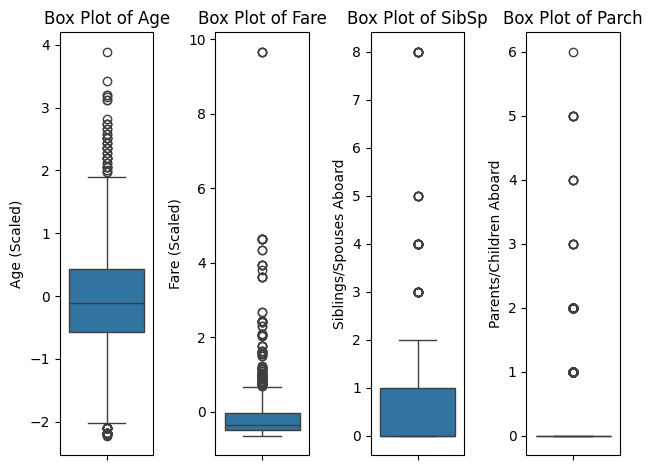

In [25]:
# Create box plot for 'Age'
plt.subplot(1, 4, 1) # 1 row, 4 columns, 1st plot
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age (Scaled)')

# Create box plot for 'Fare'
plt.subplot(1, 4, 2) # 1 row, 4 columns, 2nd plot
sns.boxplot(y=df['Fare'])
plt.title('Box Plot of Fare')
plt.ylabel('Fare (Scaled)')

# Create box plot for 'SibSp'
plt.subplot(1, 4, 3) # 1 row, 4 columns, 3rd plot
sns.boxplot(y=df['SibSp'])
plt.title('Box Plot of SibSp')
plt.ylabel('Siblings/Spouses Aboard')

# Create box plot for 'Parch'
plt.subplot(1, 4, 4) # 1 row, 4 columns, 4th plot
sns.boxplot(y=df['Parch'])
plt.title('Box Plot of Parch')
plt.ylabel('Parents/Children Aboard')

plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

In [26]:
print("\n--- Outlier Visualization Complete ---")
print("Observe the box plots above for potential outliers in 'Age', 'Fare', 'SibSp', and 'Parch'.")
print("Decisions about handling outliers (e.g., removal, transformation) would be made based on domain knowledge and further analysis.")



--- Outlier Visualization Complete ---
Observe the box plots above for potential outliers in 'Age', 'Fare', 'SibSp', and 'Parch'.
Decisions about handling outliers (e.g., removal, transformation) would be made based on domain knowledge and further analysis.


In [27]:
# The DataFrame `df` is clean and ready for machine learning model training!
print("\n--- Final DataFrame Head (Cleaned and Prepared) ---")
df.head()


--- Final DataFrame Head (Cleaned and Prepared) ---


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,False,False,True
1,1,1,1,0.663861,1,0,0.786845,True,False,False
2,1,3,1,-0.258337,0,0,-0.488854,False,False,True
3,1,1,1,0.433312,1,0,0.420730,False,False,True
4,0,3,0,0.433312,0,0,-0.486337,False,False,True


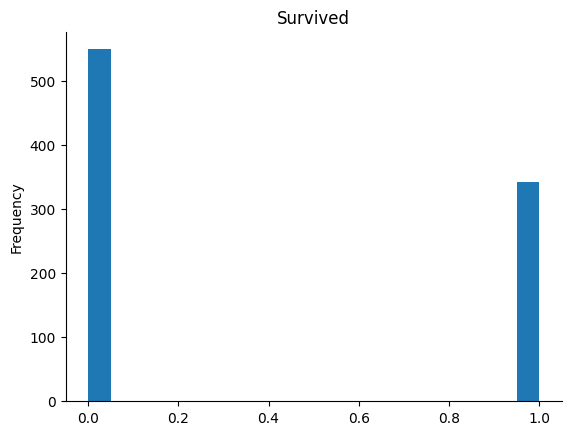

In [28]:
from matplotlib import pyplot as plt
df['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

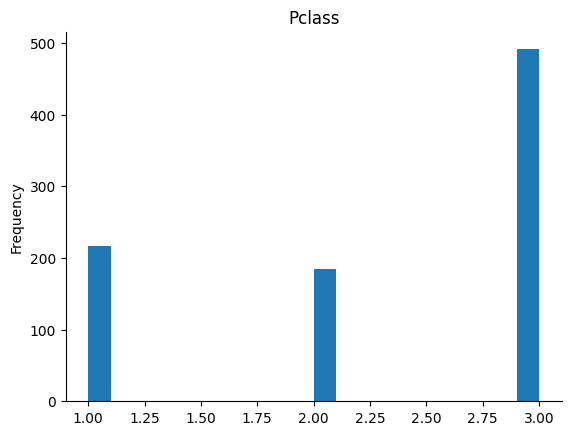

In [29]:
from matplotlib import pyplot as plt
df['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-30-14c20a2c7e20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Pclass', y='Embarked_C', inner='box', palette='Dark2')


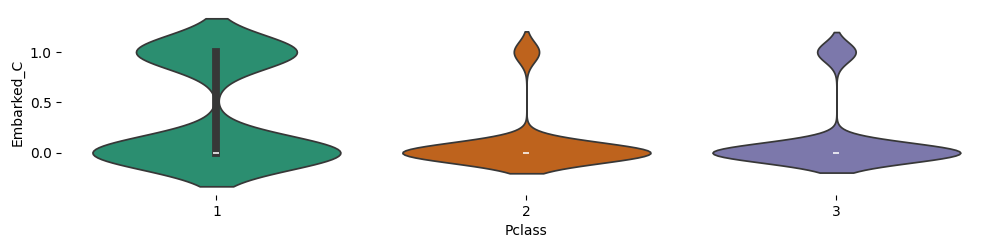

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Embarked_C'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Pclass', y='Embarked_C', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

---

In [31]:
# Define numerical columns to evaluate
numerical_cols_for_outliers = ['Age', 'Fare', 'SibSp', 'Parch']

In [32]:
# Function to count outliers using IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

In [33]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [34]:
# --- Count Outliers BEFORE Removal ---
print("\n--- Outlier Counts Before Removal ---")
outliers_before = {}
total_before = 0
for col in numerical_cols_for_outliers:
    count = count_outliers_iqr(df, col)
    outliers_before[col] = count
    total_before += count
    print(f"Column '{col}': {count} outliers")
print(f"\nTotal outliers before removal: {total_before}")


--- Outlier Counts Before Removal ---
Column 'Age': 66 outliers
Column 'Fare': 116 outliers
Column 'SibSp': 46 outliers
Column 'Parch': 213 outliers

Total outliers before removal: 441


---
### Remove Outliers

In [35]:
# --- Remove Outliers ---
df_cleaned = df.copy()
for col in numerical_cols_for_outliers:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

In [36]:
# --- Count Outliers AFTER Removal ---
print("\n--- Final Outlier Counts (After Removal) ---")
outliers_after = {}
total_after = 0
for col in numerical_cols_for_outliers:
    count = count_outliers_iqr(df_cleaned, col)
    outliers_after[col] = count
    total_after += count
    print(f"Column '{col}': {count} outliers")
print(f"\nTotal remaining outliers across all numerical columns: {total_after}")


--- Final Outlier Counts (After Removal) ---
Column 'Age': 43 outliers
Column 'Fare': 64 outliers
Column 'SibSp': 104 outliers
Column 'Parch': 0 outliers

Total remaining outliers across all numerical columns: 211


---
### Outlier Summary

* **Before Removal**:
  Total outliers = **441**

  * Age: 66
  * Fare: 116
  * SibSp: 46
  * Parch: 213

* **After Removal**:
  Total outliers = **211**

  * Age: 43
  * Fare: 64
  * SibSp: 104
  * Parch: 0

**Overall reduction**: 230 outliers removed

---



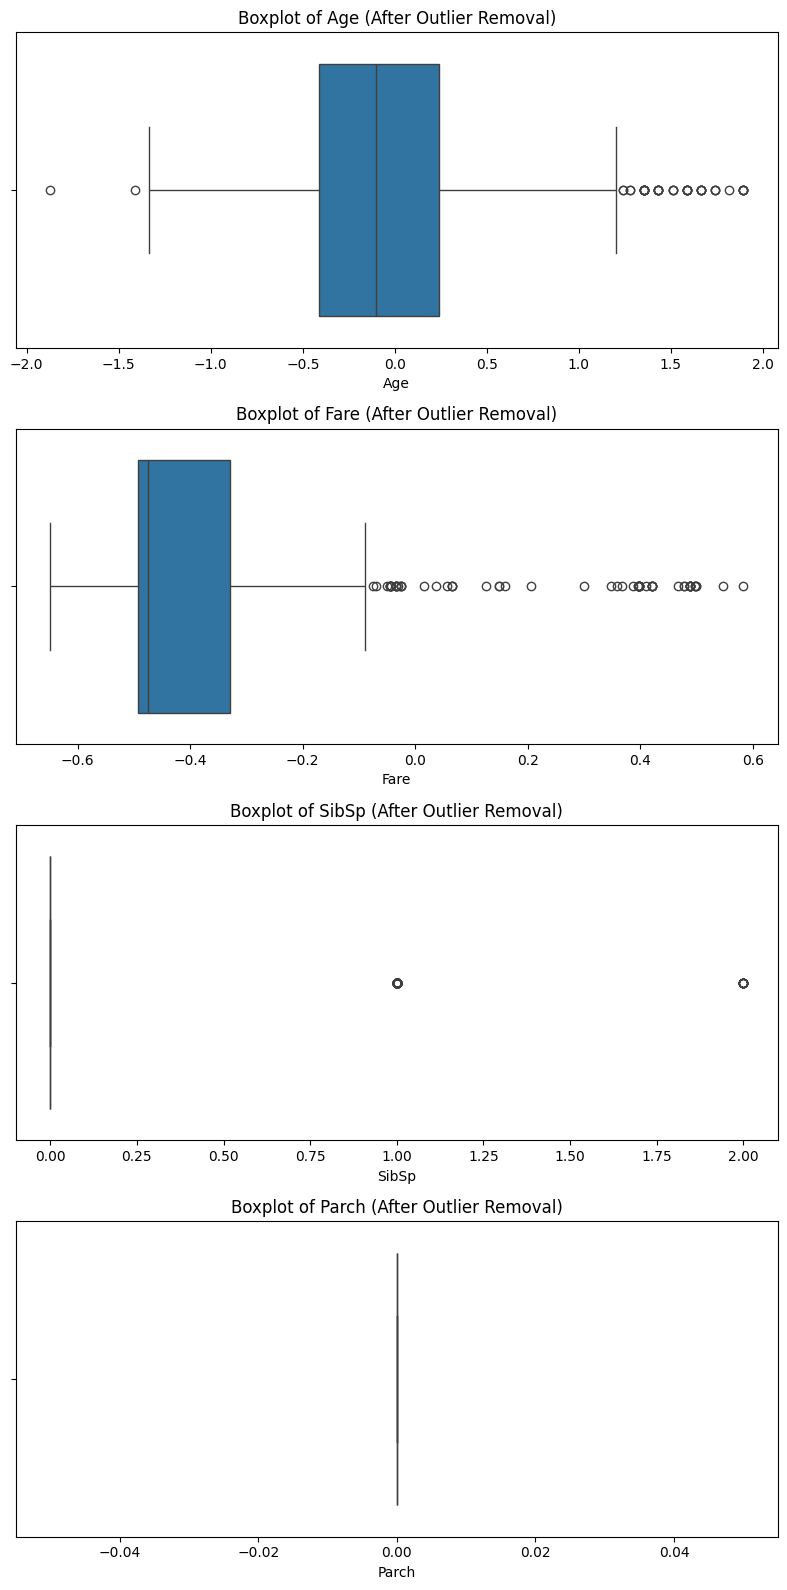

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to visualize
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Ensure the figure is tall enough for 4 vertical boxplots
plt.figure(figsize=(8, 16))

# Create 4 vertically stacked subplots
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 1, i + 1)  # i+1 ensures the subplot index is 1 to 4
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()
